In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
import pandas as pd




In [2]:
df = pd.read_csv('vgsales.csv',encoding = 'unicode_escape')

In [3]:
df.shape


(16598, 11)

In [4]:
df.head(10)

,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
5,6,Tetris,GB,1989.0,Puzzle,Nintendo,23.20,2.26,4.22,0.58,30.26
6,7,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
7,8,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.02
8,9,New Super Mario Bros. Wii,Wii,2009.0,Platform,Nintendo,14.59,7.06,4.70,2.26,28.62
9,10,Duck Hunt,NES,1984.0,Shooter,Nintendo,26.93,0.63,0.28,0.47,28.31


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Rank          16598 non-null  int64  
 1   Name          16598 non-null  object 
 2   Platform      16598 non-null  object 
 3   Year          16327 non-null  float64
 4   Genre         16598 non-null  object 
 5   Publisher     16540 non-null  object 
 6   NA_Sales      16598 non-null  float64
 7   EU_Sales      16598 non-null  float64
 8   JP_Sales      16598 non-null  float64
 9   Other_Sales   16598 non-null  float64
 10  Global_Sales  16598 non-null  float64
dtypes: float64(6), int64(1), object(4)
memory usage: 1.4+ MB


In [6]:
#checking for null  values
pd.isnull(df).sum()

Rank              0
Name              0
Platform          0
Year            271
Genre             0
Publisher        58
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
dtype: int64

In [7]:
df.dropna(inplace=True)

In [8]:
pd.isnull(df)


,Rank,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
16593,False,False,False,False,False,False,False,False,False,False,False
16594,False,False,False,False,False,False,False,False,False,False,False
16595,False,False,False,False,False,False,False,False,False,False,False
16596,False,False,False,False,False,False,False,False,False,False,False


In [9]:
pd.isnull(df).sum()

Rank            0
Name            0
Platform        0
Year            0
Genre           0
Publisher       0
NA_Sales        0
EU_Sales        0
JP_Sales        0
Other_Sales     0
Global_Sales    0
dtype: int64

In [10]:
df.shape

(16291, 11)

In [11]:
df[['EU_Sales','JP_Sales','Other_Sales','Global_Sales']] = df[['EU_Sales','JP_Sales','Other_Sales','Global_Sales']].astype('int')


In [ ]:
df.columns

In [13]:
df.rename(columns={
    'NA_Sales': 'North America Sales', 
    'EU_Sales': 'Europe Sales', 
    'JP_Sales': 'Japan Sales',
    'Global_Sales': 'Worldwide_Sales'
}, inplace=True)



In [29]:
df.columns


Index(['Rank', 'Name', 'Platform', 'Year', 'Genre', 'Publisher',
       'North America Sales', 'Europe Sales', 'Japan Sales', 'Other_Sales',
       'Worldwide_Sales'],
      dtype='object')

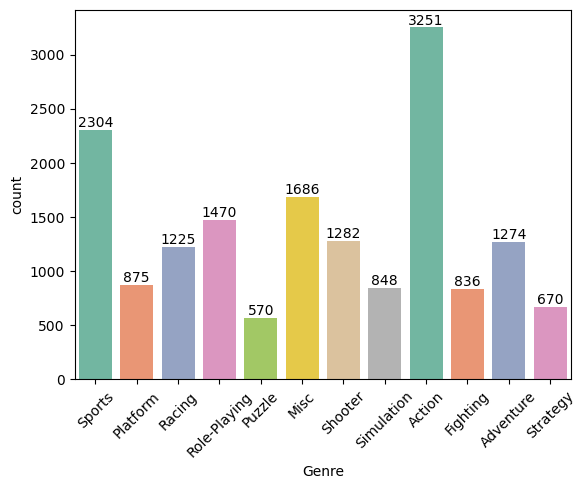

In [30]:
vg = sb.countplot(x='Genre', data=df, hue='Genre', palette='Set2', legend=False)  

for bars in vg.containers:
    vg.bar_label(bars)

plt.xticks(rotation=45)  # Rotates x-axis 
plt.show()   #Displays

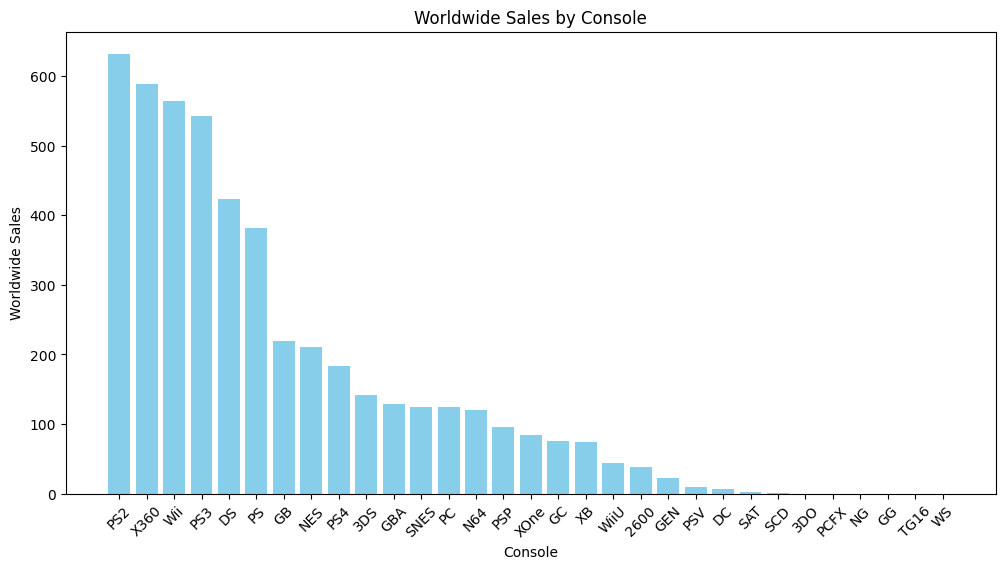

In [31]:


# Group by platform and sum worldwide sales
sales_gen = df.groupby(['Platform'], as_index=False)['Worldwide_Sales'].sum().sort_values(by='Worldwide_Sales', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(sales_gen['Platform'], sales_gen['Worldwide_Sales'], color='skyblue')

# Customizing the plot
plt.xlabel('Console')
plt.ylabel('Worldwide Sales')
plt.title('Worldwide Sales by Console')
plt.xticks(rotation=45)  

plt.show()

                                                      

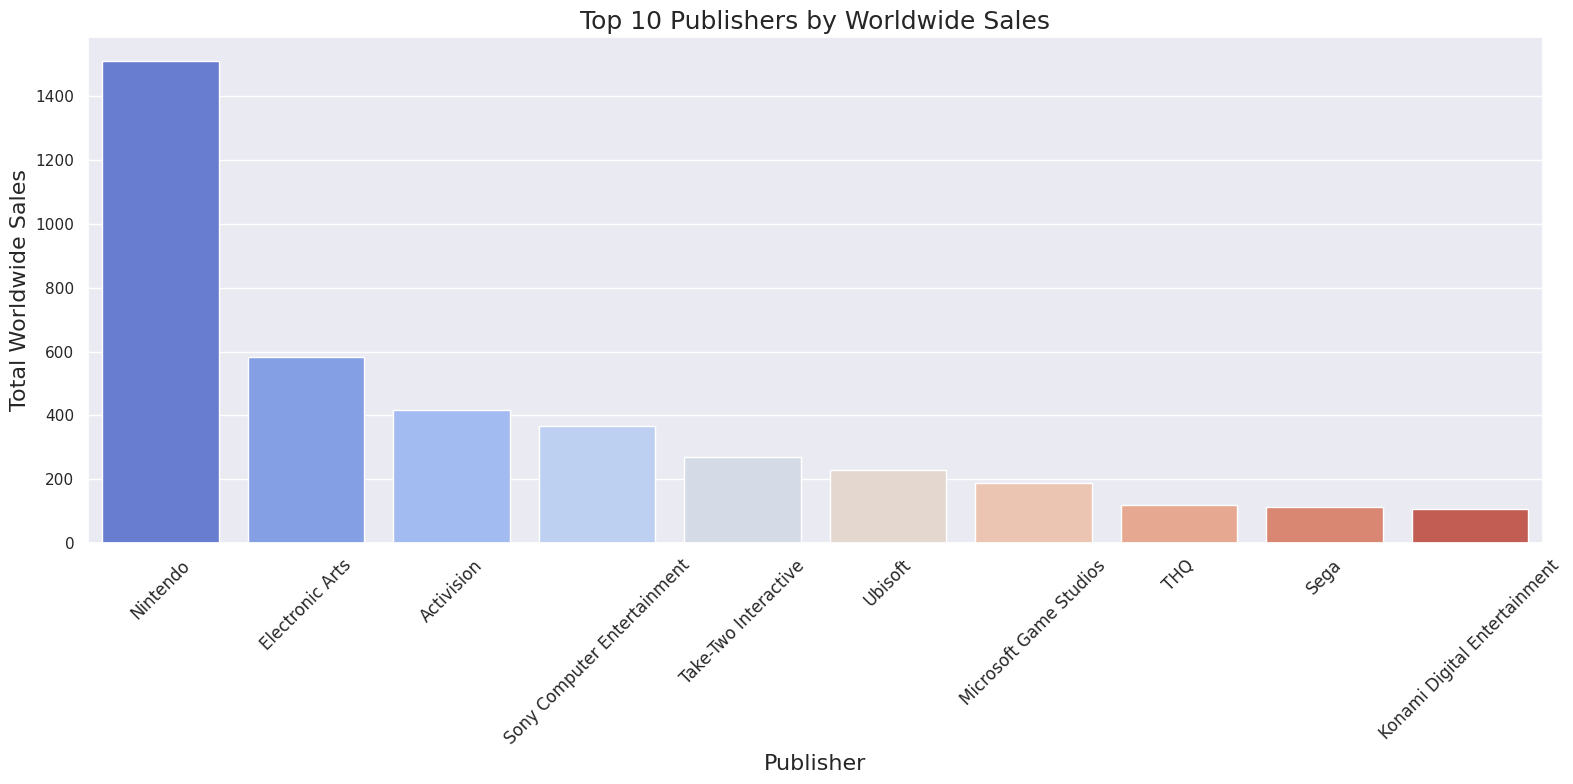

In [64]:


# Group data for top 10 publishers and their worldwide sales
top_publishers_sales = df.groupby('Publisher')['Worldwide_Sales'].sum().sort_values(ascending=False).head(10)

# Increase figure size for better visualization
plt.figure(figsize=(16, 8))

# Use hue with the x variable (e.g., Publisher) and set legend=False
sb.barplot(
    x=top_publishers_sales.index,
    y=top_publishers_sales.values,
    palette='coolwarm',
    hue=top_publishers_sales.index  # Assign x variable to hue
)
plt.legend([], [], frameon=False)  # Hide the legend

# Add title and axis labels
plt.title('Top 10 Publishers by Worldwide Sales', fontsize=18)
plt.xlabel('Publisher', fontsize=16)
plt.ylabel('Total Worldwide Sales', fontsize=16)
plt.xticks(rotation=45, fontsize=12)

# Ensure layout fits well and display the plot
plt.tight_layout()
plt.show()





Top-selling region: North America ($4327.65M)


<ipython-input-71-e3cb80c513ac>:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sb.barplot(x='Region', y='Sales', data=sales_data, palette='rocket')


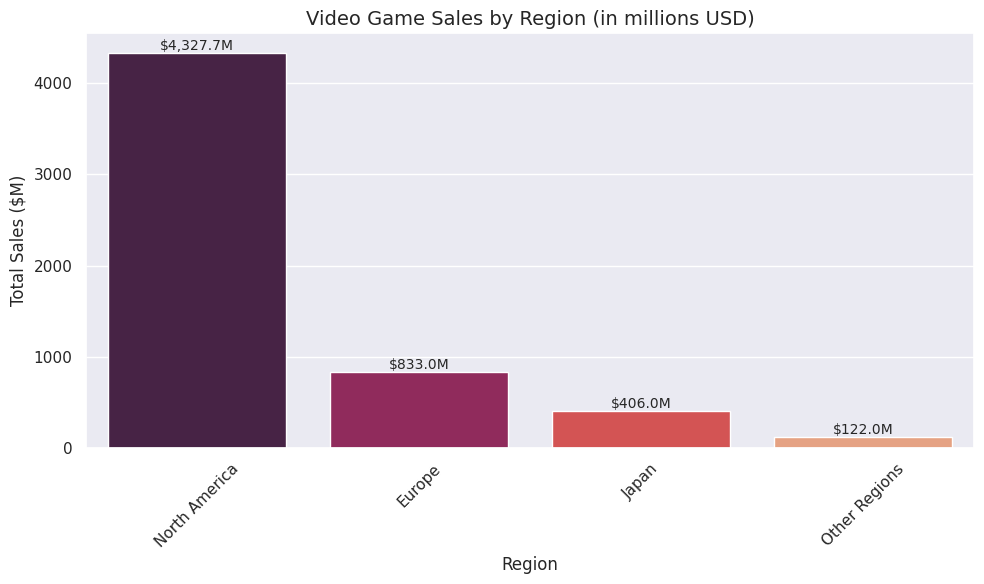

In [71]:

# 1. Calculate total sales by region (in millions)
na_sales = df['North America Sales'].sum()
eu_sales = df['Europe Sales'].sum()
jp_sales = df['Japan Sales'].sum()
other_sales = df['Other_Sales'].sum()

# 2. Create a DataFrame for visualization
sales_data = pd.DataFrame({
    'Region': ['North America', 'Europe', 'Japan', 'Other Regions'],
    'Sales': [na_sales, eu_sales, jp_sales, other_sales]
})

# 3. Find the top-selling region
top_region = sales_data.loc[sales_data['Sales'].idxmax()]
print(f"Top-selling region: {top_region['Region']} (${top_region['Sales']:.2f}M)")

# 4. Create the visualization
plt.figure(figsize=(10, 6))
sb.barplot(x='Region', y='Sales', data=sales_data, palette='rocket')

# Customize the plot
plt.title('Video Game Sales by Region (in millions USD)', fontsize=14)
plt.xlabel('Region', fontsize=12)
plt.ylabel('Total Sales ($M)', fontsize=12)
plt.xticks(rotation=45)

# Add value labels on bars
for index, value in enumerate(sales_data['Sales']):
    plt.text(index, value, f"${value:,.1f}M", 
             ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

North America represents 89.4% of worldwide sales


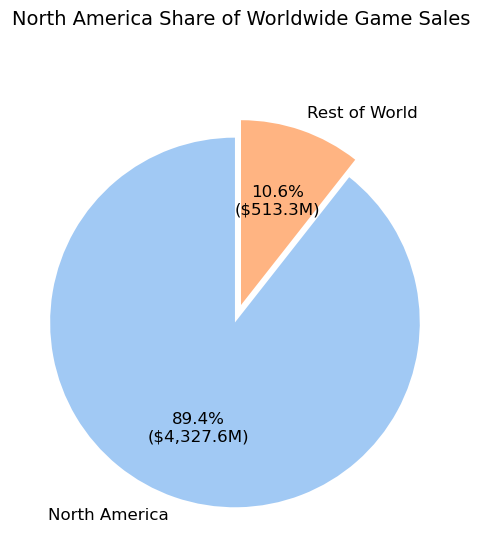

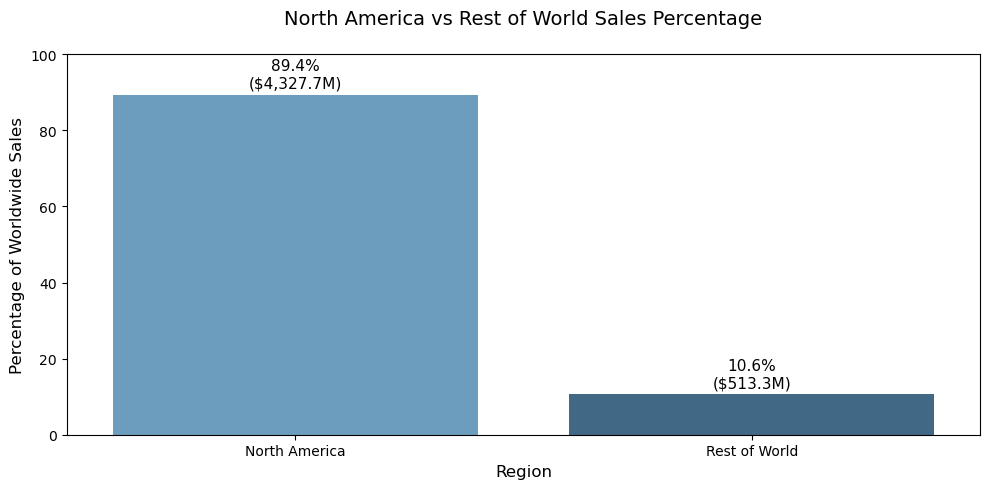

In [16]:
# Calculate total sales
total_na_sales = df['North America Sales'].sum()
total_ww_sales = df['Worldwide_Sales'].sum()

# Calculate percentage
na_percentage = (total_na_sales / total_ww_sales) * 100
other_percentage = 100 - na_percentage

# Create data for visualization
percent_data = pd.DataFrame({
    'Region': ['North America', 'Rest of World'],
    'Percentage': [na_percentage, other_percentage],
    'Sales': [total_na_sales, total_ww_sales - total_na_sales]
})

# Print the percentage
print(f"North America represents {na_percentage:.1f}% of worldwide sales")

# Create a pie chart with improved formatting
plt.figure(figsize=(10, 6))
plt.pie(percent_data['Percentage'], 
        labels=percent_data['Region'],
        autopct=lambda p: f'{p:.1f}%\n(${p*total_ww_sales/100:,.1f}M)',
        startangle=90,
        colors=sb.color_palette('pastel'),
        explode=(0.1, 0),  # Explode North America slice
        textprops={'fontsize': 12})

plt.title('North America Share of Worldwide Game Sales\n', fontsize=14, pad=20)
plt.show()

# Additional bar chart showing the comparison (fixed)
plt.figure(figsize=(10, 5))
ax = sb.barplot(x='Region', y='Percentage', hue='Region',  # Added hue parameter
                data=percent_data, palette='Blues_d',
                legend=False)  # Disabled legend

plt.title('North America vs Rest of World Sales Percentage\n', fontsize=14)
plt.ylabel('Percentage of Worldwide Sales', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.ylim(0, 100)  # Set consistent y-axis scale

# Add value labels with both percentage and dollar amounts
for index, row in percent_data.iterrows():
    ax.text(index, row['Percentage']+1, 
            f"{row['Percentage']:.1f}%\n(${row['Sales']:,.1f}M)",
            ha='center', va='bottom',
            fontsize=11)

plt.tight_layout()
plt.show()

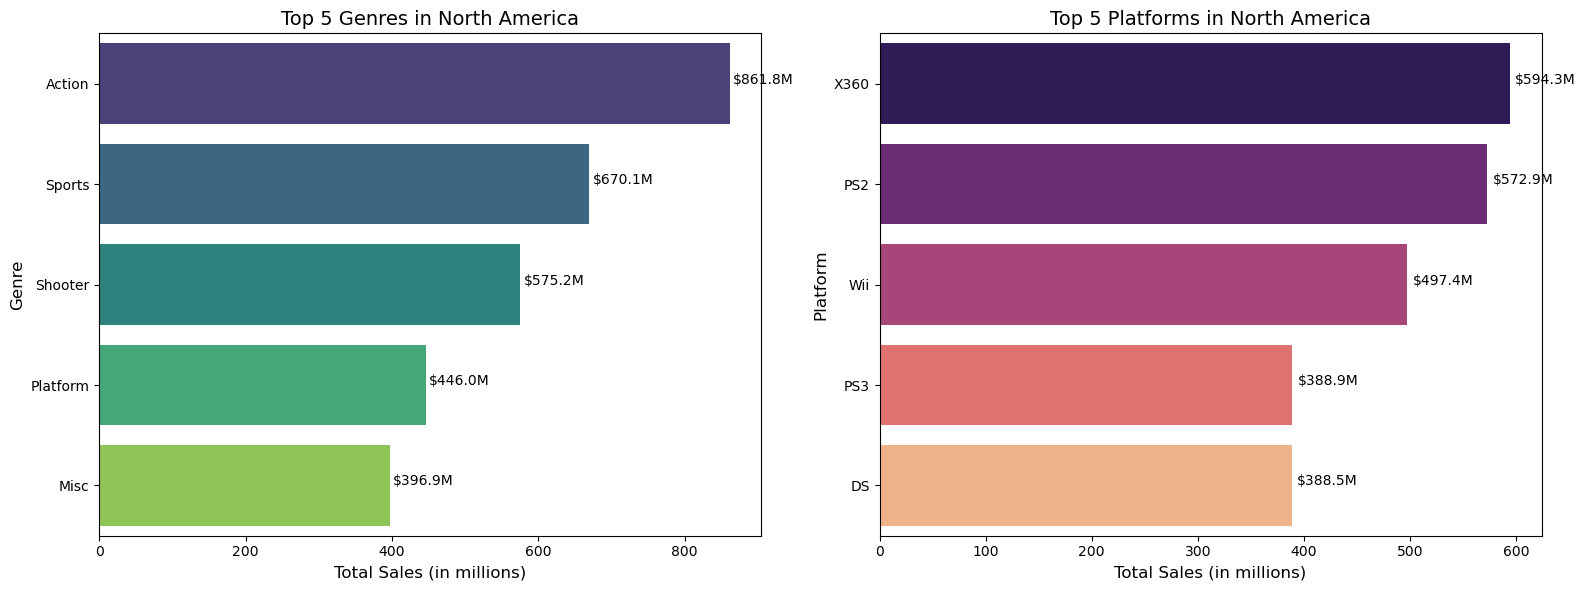


North America Market Insights:

Top Genre: Action ($861.8M)
Top Platform: X360 ($594.3M)

Genre Breakdown:
Genre
Action         861.8M
Sports         670.1M
Shooter        575.2M
Platform       446.0M
Misc           396.9M
Racing         356.9M
Role-Playing   326.5M
Fighting       220.7M
Simulation     181.8M
Puzzle         122.0M

Platform Breakdown:
Platform
X360   594.3M
PS2    572.9M
Wii    497.4M
PS3    388.9M
DS     388.5M
PS     334.7M
XB     182.1M
GBA    178.4M
N64    138.9M
GC     131.9M


In [15]:
# 1. North America's Top Genres
na_genres = df.groupby('Genre')['North America Sales'].sum().sort_values(ascending=False)
top_genres = na_genres.head(5)  # Top 5 genres

# 2. North America's Top Platforms
na_platforms = df.groupby('Platform')['North America Sales'].sum().sort_values(ascending=False)
top_platforms = na_platforms.head(5)  # Top 5 platforms

# Create visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Genre Plot
sb.barplot(x=top_genres.values, y=top_genres.index, hue=top_genres.index,
           palette='viridis', ax=ax1, dodge=False, legend=False)
ax1.set_title('Top 5 Genres in North America', fontsize=14)
ax1.set_xlabel('Total Sales (in millions)', fontsize=12)
ax1.set_ylabel('Genre', fontsize=12)
for i, v in enumerate(top_genres):
    ax1.text(v + 5, i, f"${v:.1f}M", color='black', ha='left')

# Platform Plot
sb.barplot(x=top_platforms.values, y=top_platforms.index, hue=top_platforms.index,
           palette='magma', ax=ax2, dodge=False, legend=False)
ax2.set_title('Top 5 Platforms in North America', fontsize=14)
ax2.set_xlabel('Total Sales (in millions)', fontsize=12)
ax2.set_ylabel('Platform', fontsize=12)
for i, v in enumerate(top_platforms):
    ax2.text(v + 5, i, f"${v:.1f}M", color='black', ha='left')

plt.tight_layout()
plt.show()

# Print textual summary (fixed indexing)
print("\nNorth America Market Insights:")
print(f"\nTop Genre: {top_genres.index[0]} (${top_genres.iloc[0]:.1f}M)")
print(f"Top Platform: {top_platforms.index[0]} (${top_platforms.iloc[0]:.1f}M)")

# Additional detailed breakdown
print("\nGenre Breakdown:")
print(na_genres.head(10).to_string(float_format="%.1fM"))  # Top 10 genres

print("\nPlatform Breakdown:")
print(na_platforms.head(10).to_string(float_format="%.1fM"))  # Top 10 platforms

Text(0, 0.5, 'Sales (in millions)')

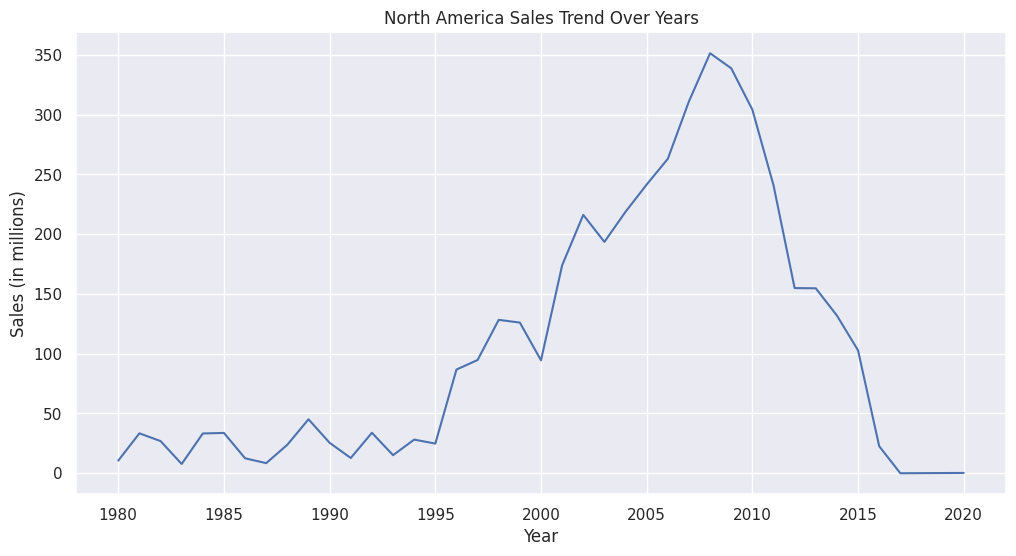

In [75]:
# Sales trend over years
plt.figure(figsize=(12,6))
df.groupby('Year')['North America Sales'].sum().plot()
plt.title('North America Sales Trend Over Years')
plt.ylabel('Sales (in millions)')

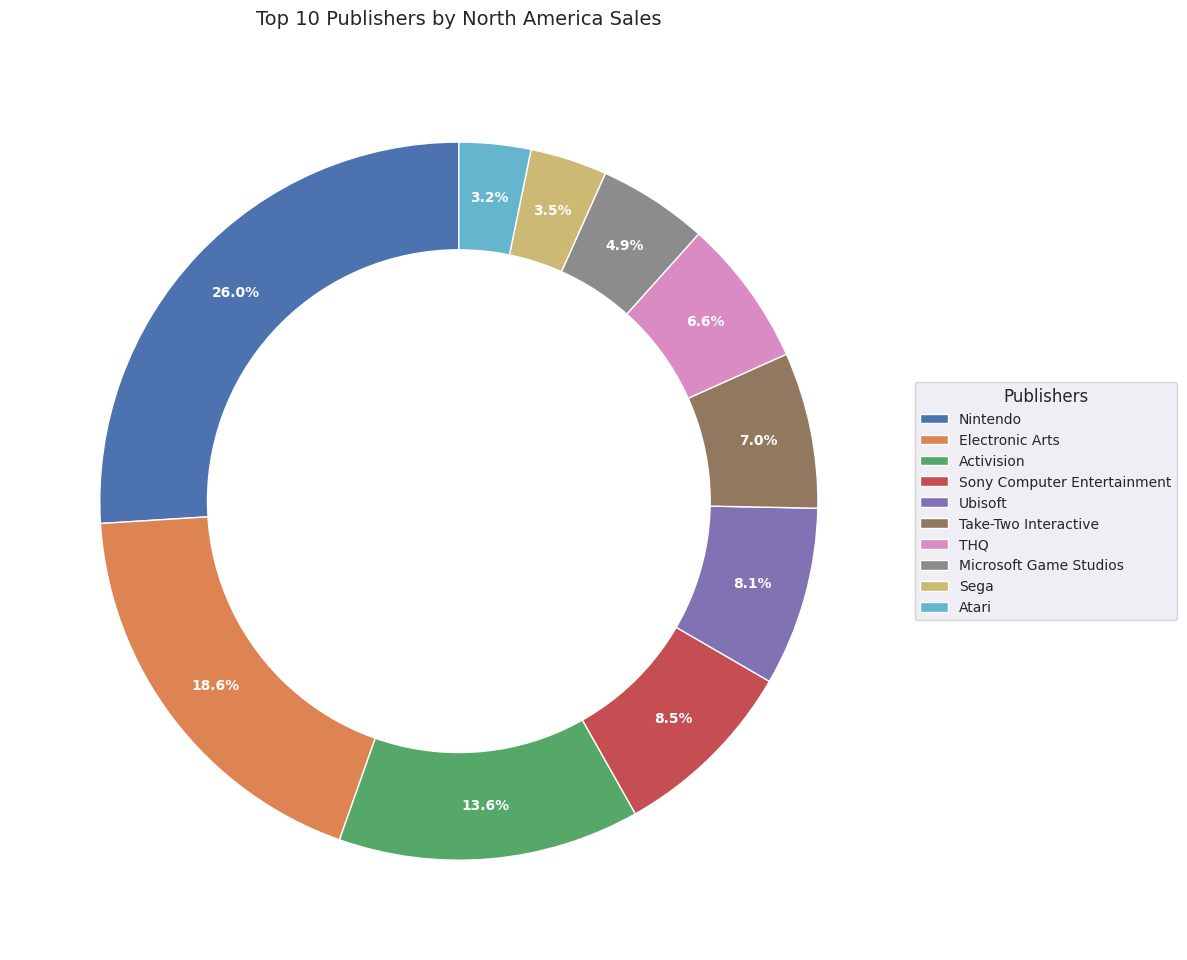

In [83]:
# Get top 10 publishers
top_pinters = df.groupby('Publisher')['North America Sales'].sum().nlargest(10)

# Create the pie chart with adjustments
plt.figure(figsize=(12, 12))
wedges, texts, autotexts = plt.pie(
    top_pinters,
    labels=None,  
    autopct='%1.1f%%',
    startangle=90,
    pctdistance=0.85,  
    textprops={'fontsize': 10, 'color': 'white', 'weight': 'bold'},
    wedgeprops={'edgecolor': 'white', 'linewidth': 1}
)

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

plt.legend(
    wedges,
    top_pinters.index,
    title="Publishers",
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

plt.ylabel('')  
plt.title('Top 10 Publishers by North America Sales', pad=20, fontsize=14)
plt.tight_layout()  # Prevents legend cutoff
plt.show()

In [82]:
from IPython.display import display, Markdown

na_sales = df['North America Sales'].sum()
ww_sales = df['Worldwide_Sales'].sum()

display(Markdown(f"""
 Metrics
| Metric | Value |
|--------|-------|
| North America Sales | ${na_sales:,.1f}M |
| % of Worldwide Sales | {na_sales/ww_sales*100:.1f}% |
| Top Genre | {df.groupby('Genre')['North America Sales'].sum().idxmax()} |
| Top Platform | {df.groupby('Platform')['North America Sales'].sum().idxmax()} |
"""))


 Metrics
| Metric | Value |
|--------|-------|
| North America Sales | $4,327.7M |
| % of Worldwide Sales | 89.4% |
| Top Genre | Action |
| Top Platform | X360 |
